In [1]:
#pip install tensorflow
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
test_labels.shape

(10000,)

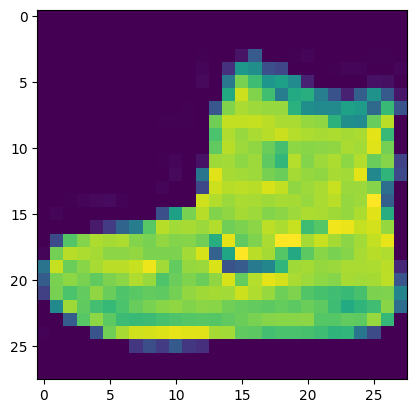

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show()

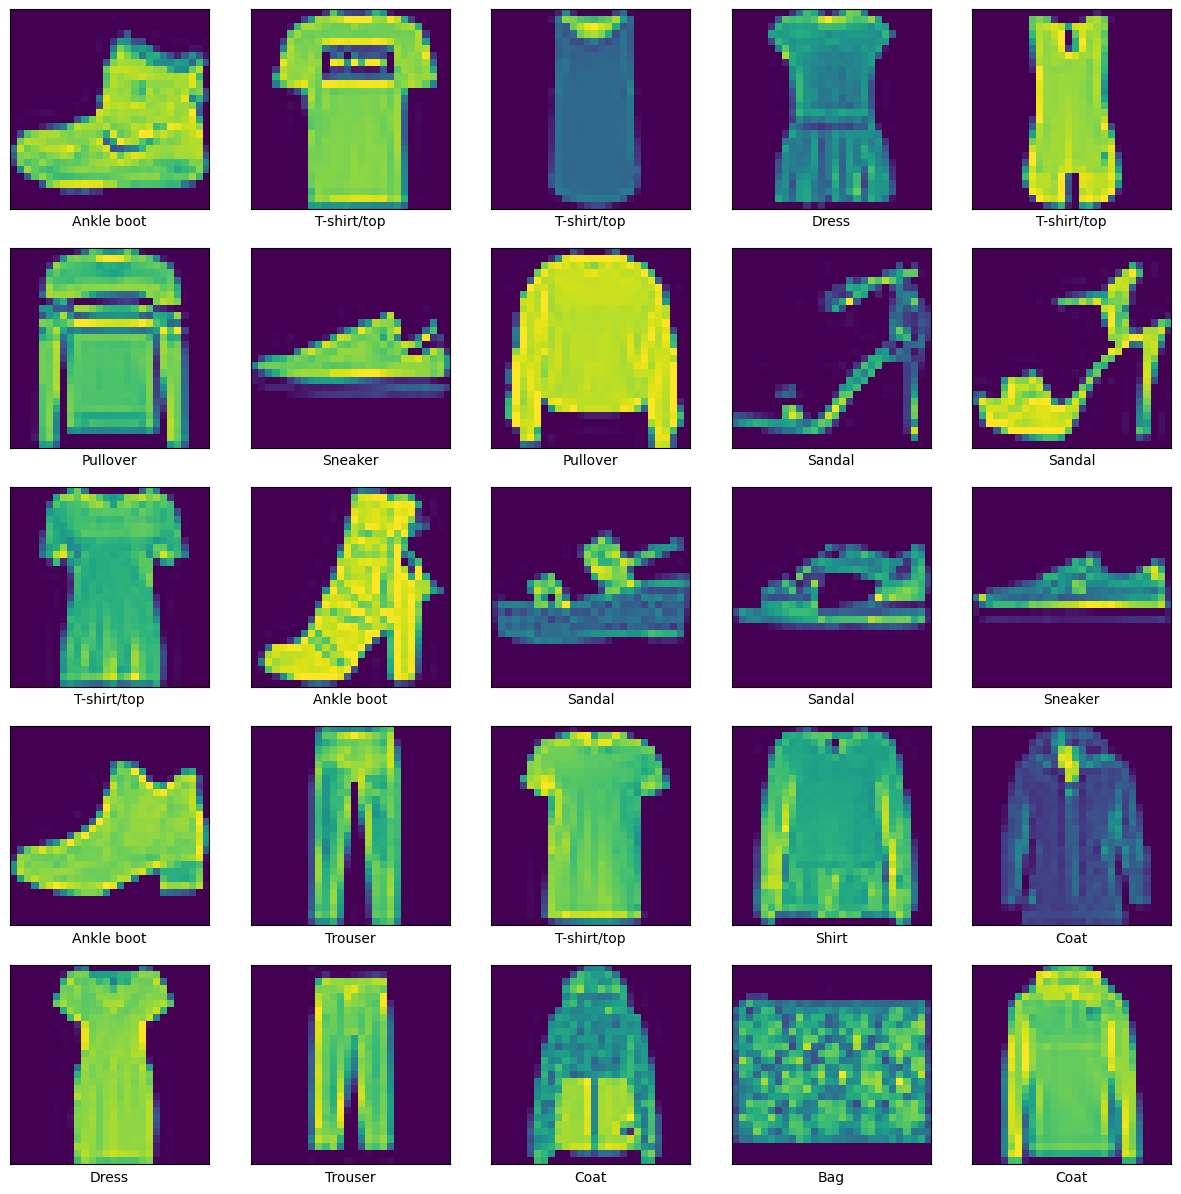

In [7]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.4993 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3746 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3364 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3112 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2948 - accuracy: 0.8933
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2803 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2692 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2559 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2489 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

Text(0.5, 1.0, 'Training Loss and Accuracy')

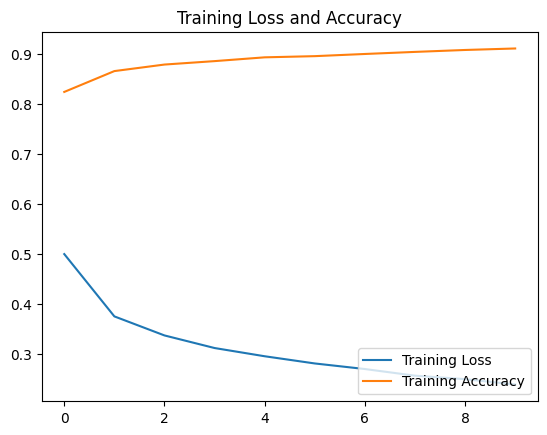

In [11]:
loss = history.history["loss"]
acc = history.history["accuracy"]
epochs_range = range(10)
plt.plot(epochs_range, loss,label="Training Loss")
plt.plot(epochs_range, acc,label="Training Accuracy")
plt.legend(loc="lower right")
plt.title("Training Loss and Accuracy")

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy:", test_acc)

313/313 - 1s - loss: 0.3560 - accuracy: 0.8783 - 1s/epoch - 4ms/step
Test Accuracy: 0.8783000111579895


In [13]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 3ms/step


array([4.5138901e-07, 1.5989141e-08, 3.0890468e-10, 1.6211096e-12,
       5.4396395e-08, 2.1261894e-03, 1.3096478e-09, 2.5371250e-02,
       1.4499324e-06, 9.7250056e-01], dtype=float32)

In [14]:
# viewpredictions
import numpy as np
np.argmax(predictions[0])

9

In [15]:
def plot_image(i, predictions_array,true_label,img):
    true_label, img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
    100*np.max(predictions_array),
    class_names[true_label]),
    color=color)
    
def plot_value_array(i, predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array,color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

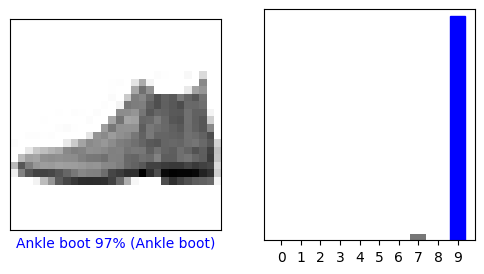

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)
plt.show()

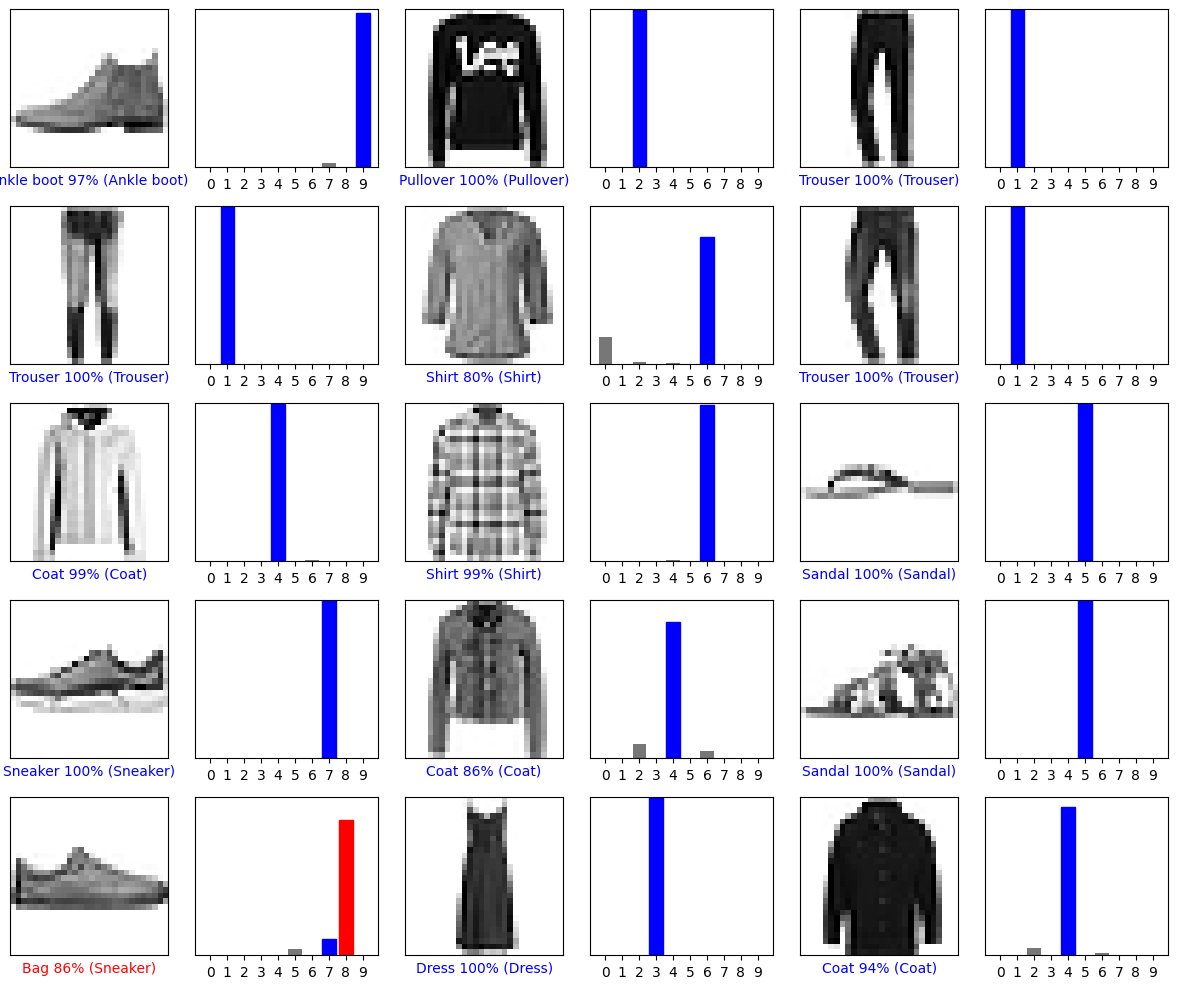

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i],test_labels,test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i],test_labels)
plt.tight_layout()
plt.show()